In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Teilversuch 2
## Tiefpass
### Messwerte

In [66]:
f  = np.array([0.15,0.31,0.60,1.00,1.50,2.01,2.52,3.01,3.50,4.00,4.25,4.50,4.73, 5.01])*1e3
u1 = np.array([3.98,3.97,3.93,3.94,3.94,3.93,3.96,3.92,3.93,3.93,3.93,3.91,3.90, 3.90])
u2 = np.array([3.90,3.81,3.59,3.24,2.81,2.33,2.01,1.82,1.58,1.38,1.33,1.25,1.18, 1.14])

g = u2/u1
g_error = np.sqrt((0.05/u1)**2+(0.05/u2)**2)

### Curve Fit

In [67]:
from scipy.optimize import curve_fit

def damping(f,r,c):
    return 1/(np.sqrt((2*np.pi*f*r*c)**2+1))

pinit = np.array([1e3,1e-9])
out,cov = curve_fit(damping,f,g,pinit,g_error)

fit_graph = damping(f,out[0],out[1])

#Error is Mean squared Error 
mse = np.sqrt(np.mean((g-fit_graph)**2))

fit_graph_min = fit_graph-mse
fit_graph_max = fit_graph +mse

### Grenzfrequenz und Grenzwerte

In [68]:
r = 10e3
c = 10e-9
fg = 1/(r*c*2*np.pi)
fg_err = fg*np.sqrt((0.01)**2+(0.01)**2)

fg_fit = damping(fg,out[0],out[1])
fg_fit_error = fg_fit*np.sqrt((fg_err/fg)**2)+mse

print('theoretische Grenzfrequenz \t\t≈ '+str(np.round(fg/1e3,2))+' ± '+str(np.round(fg_err/1e3,2))+' kHz')
print('1/sqrt(2) \t\t\t\t≈ '+str(np.round(1.0/np.sqrt(2),1)))
print('curve-Fit bei theo. Grenzfrequenz \t≈ '+str(np.round(damping(fg,out[0],out[1]),2))+' ± '+str(np.round(fg_fit_error,2)))

theoretische Grenzfrequenz 		≈ 1.59 ± 0.02 kHz
1/sqrt(2) 				≈ 0.7
curve-Fit bei theo. Grenzfrequenz 	≈ 0.68 ± 0.02


In [69]:
fe = 1/(2*np.pi*out[0]*out[1])
fe_error = fe*np.sqrt((0.05)**2+(0.05)**2)
print('Grenzfrequenz des curve-fit: '+str(np.round(fe/1e3,2))+' ± '+str(np.round(fe_error/1e3,1))+' kHz')

Grenzfrequenz des curve-fit: 1.5 ± 0.1 kHz


### Extrapolierte Werte

In [70]:
print('theoretischer  Wert bei 0: '+str(damping(0,r,c)))
print('extrapolierter Wert bei 0: '+str(np.round(damping(0,out[0],out[1])))+' ± '+str(np.round(mse,2)))

theoretischer  Wert bei 0: 1.0
extrapolierter Wert bei 0: 1.0 ± 0.01


In [71]:
print('theoretischer  Wert bei ∞: '+str(np.round(damping(10e30,r,c),4)))
print('extrapolierter Wert bei ∞: '+str(np.round(damping(10e30,out[0],out[1]))))

theoretischer  Wert bei ∞: 0.0
extrapolierter Wert bei ∞: 0.0


### Plot

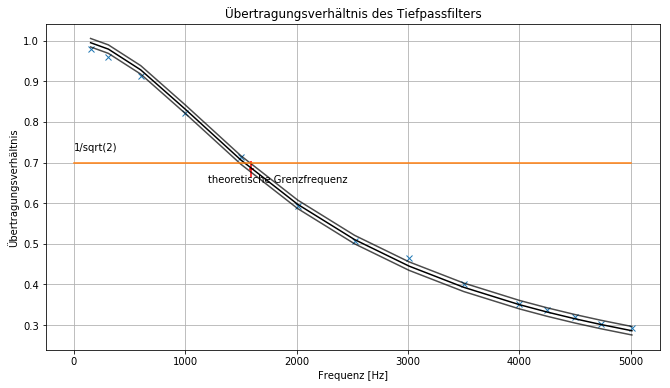

In [72]:
plt.figure(figsize = (11,6))
plt.title('Übertragungsverhältnis des Tiefpassfilters')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Übertragungsverhältnis')
plt.grid(True)

plt.plot(f,g,'x')
plt.plot(f,fit_graph,color = 'black')
plt.plot(f,fit_graph_min,color= 'black',alpha = 0.7)
plt.plot(f,fit_graph_max,color = 'black',alpha = 0.7)


plt.errorbar(fg,damping(fg,out[0],out[1]),yerr = fg_fit_error,xerr = fg_err,color='red')
plt.text(1200,0.65,'theoretische Grenzfrequenz')


plt.plot([0,5000],[0.7,0.7])
plt.text(0,0.73,'1/sqrt(2)')

plt.show()

Die gemessenen und theoretischen Werte stimmen im Rahmen des Fehlers überein.

## Hochpass
### Messwerte

In [116]:
f  = np.array([0.15,0.30,0.61,1.08,1.50,2.01,2.50,3.00,3.52,4.00,4.50,4.75,5.00])*1e3
u1 = np.array([3.94,3.91,3.92,3.87,3.92,3.90,3.94,3.93,3.89,3.89,3.96,3.89,3.91])
u2 = np.array([0.08,0.15,0.28,0.45,0.67,0.87,1.10,1.29,1.48,1.68,1.86,1.91,1.95])

g = u2/u1
g_error = np.sqrt((0.05/u1)**2+(0.05/u2)**2)*g

### Curve Fit

In [117]:
from scipy.optimize import curve_fit

def damping(f,r,l):
    return 1/(np.sqrt((r/(2*np.pi*f*l))**2+1))

pinit = np.array([10e3,0.185])
out,cov = curve_fit(damping,f,g,pinit,g_error)

fit_graph = damping(f,out[0],out[1])
dense_fit_graph = damping(np.arange(0.15,8.7e3,200),out[0],out[1])

#Error is Mean squared Error 
mse = np.sqrt(np.mean((g-fit_graph)**2))

dense_fit_graph_min = dense_fit_graph-mse
dense_fit_graph_max = dense_fit_graph+mse

### Grenzfrequenz und Grenzwerte

In [118]:
r = 10e3
l = 0.185
fg = r/(l*2*np.pi)
fg_error = fg*np.sqrt((0.05)**2+(0.05)**2)
fg_fit = damping(fg,out[0],out[1])
fg_fit_err = fg_fit*np.sqrt((fg_error/fg)**2)+mse

print('theoretische Grenzfrequenz \t\t≈ '+str(np.round(fg/1e3,2))+' ± '+str(np.round(fg_error/1e3,1))+' kHz')
print('1/sqrt(2) \t\t\t\t≈ '+str(np.round(1.0/np.sqrt(2),2)))
print('curve-Fit bei theo. Grenzfrequenz \t≈ '+str(np.round(damping(fg,out[0],out[1]),2))+' ± '+str(np.round(fg_fit_err,2)))

theoretische Grenzfrequenz 		≈ 8.6 ± 0.6 kHz
1/sqrt(2) 				≈ 0.71
curve-Fit bei theo. Grenzfrequenz 	≈ 0.71 ± 0.05


Dieser letzte Wert befindet sich allerdings weit außerhalb des gemessenen Bereichs und sollte der Fehler warscheinlich vergrößert werden. Der theoretische Wert stimmt aber mit dem gemessenen trotzdem überein.

In [119]:
fe = out[0]/(2*np.pi*out[1])
fe_error = fe*np.sqrt((0.05)**2+(0.05)**2)
print('Grenzfrequenz des curve-fit: '+str(np.round(fe/1e3,1))+' ± '+str(np.round(fe_error/1e3,1))+' kHz')

Grenzfrequenz des curve-fit: 8.6 ± 0.6 kHz


### Extrapolierte Werte

In [120]:
print('theoretischer  Wert bei 0: '+str(np.round(damping(1e-30,r,c),4)))
print('extrapolierter Wert bei 0: '+str(np.round(damping(1e-30,out[0],out[1]))))

theoretischer  Wert bei 0: 0.0
extrapolierter Wert bei 0: 0.0


In [121]:
print('theoretischer  Wert bei ∞: '+str(np.round(damping(10e30,r,c),4)))
print('extrapolierter Wert bei ∞: '+str(np.round(damping(10e30,out[0],out[1]))))

theoretischer  Wert bei ∞: 1.0
extrapolierter Wert bei ∞: 1.0


### Plot

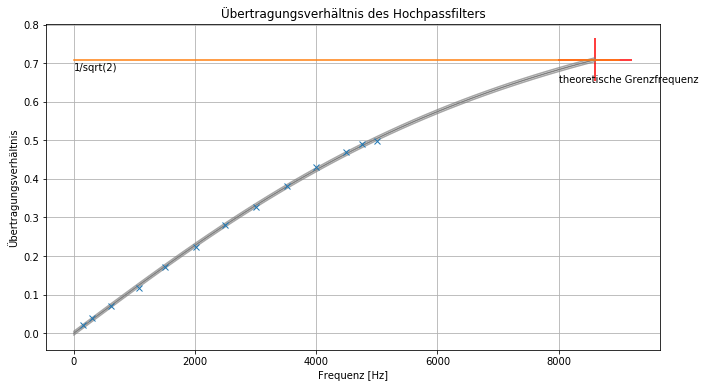

In [126]:
plt.figure(figsize = (11,6))
plt.title('Übertragungsverhältnis des Hochpassfilters')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Übertragungsverhältnis')
plt.grid(True)


plt.plot(np.arange(0.15,8.7e3,200),dense_fit_graph,color = 'gray')
plt.plot(np.arange(0.15,8.7e3,200),dense_fit_graph_max,color = 'gray',alpha = 0.7)
plt.plot(np.arange(0.15,8.7e3,200),dense_fit_graph_min,color = 'gray',alpha = 0.7)
plt.plot(f,g,'x')


plt.errorbar(fg,damping(fg,out[0],out[1]),yerr = fg_fit_err,xerr=fg_error,color='red')
plt.text(8000,0.65,'theoretische Grenzfrequenz')


plt.plot([0,9000],[1/np.sqrt(2),1/np.sqrt(2)])
plt.text(0,0.68,'1/sqrt(2)')

plt.show()

Im Nachinein ist es offensichtlich, dass wir einen deutlich größeren Bereich hätten vermessen sollen, da wir die Grenzfrequenz nicht ordentlich gemessen haben. Die bis jetzt gemessenen Werte sind aber soweit alle nicht schlecht.

# Teilversuch 3
### Messwerte

In [195]:
f  = np.array([3.00,3.12,3.21,3.30,3.40,3.43,3.50,3.57,3.82,4.00,4.49,5.06,5.50,6.00])*1e3
ur = np.array([3.82,3.78,3.82,3.93,3.93,3.89,3.88,3.88,3.89,3.88,3.85,3.74,3.66,3.51])
ug = np.array([3.91,3.91,3.93,3.89,3.89,3.92,3.92,3.90,3.90,3.92,3.92,3.92,3.92,3.91])

i = ur/340.0
i_error = (0.01/i)*i

### Theoretisches Maximum

In [196]:
l = 0.185
c = 10e-9
fth = 1/(1000*2*np.pi*np.sqrt(0.185*10e-9))
fth_err = np.round((fth*np.sqrt((0.5*0.01)**2+(0.5*0.01)**2))/1000.0,5)
print('Theoretische Resonanzmaximum bei '+str(np.round(fth,5))+'±'+str(fth_err)+' kHz.')

Theoretische Resonanzmaximum bei 3.70028±3e-05 kHz.


### Plot

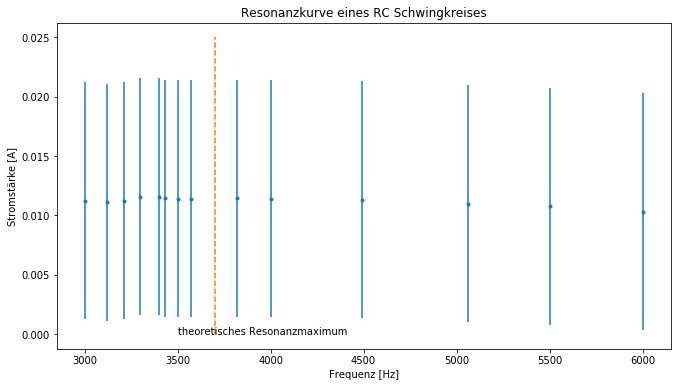

In [197]:
plt.figure(figsize=(11,6))
plt.title('Resonanzkurve eines RC Schwingkreises')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Stromstärke [A]')
plt.errorbar(f,i,yerr = i_error,fmt = '.')
plt.plot([fth*1000,fth*1000],[0,0.025],'--')
plt.text(3500,0.0,'theoretisches Resonanzmaximum')
plt.show()


Unter Einbezug des Fehlers zeigt die Stromsträrke unserer Messung keinerlei relevante Phänomene.

### alternative Messwerte 
Wir haben diese Messwerte von einer Tutorin erhalten um dennoch eine sinvolle Auswertung zu erstellen.

In [198]:
f = np.array([3,3.6,4,4.2,4.3,4.34,4.41,4.47,4.5,4.7,5.0,5.5])*1e3
ur = np.array([0.45,0.755,1.42,2.03,2.34,2.49,2.64,2.67,2.58,2.07,1.44,0.88])
i = ur/340
i_err = 0.05*i

### Plot

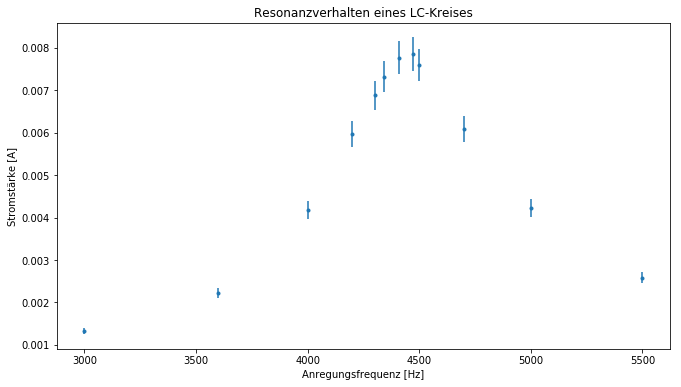

In [204]:
plt.figure(figsize = (11,6))
plt.title('Resonanzverhalten eines LC-Kreises')
plt.ylabel('Stromstärke [A]')
plt.xlabel('Anregungsfrequenz [Hz]')

plt.errorbar(f,i,yerr=i_err,fmt = '.')
plt.show()